## Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9
0,1,337,118,4,4.5,4.5,9.65,1,0.92,NaN
1,2,324,107,4,4.0,4.5,8.87,1,0.76,NaN
2,3,316,104,3,3.0,3.5,8.00,1,0.72,NaN
3,4,322,110,3,3.5,2.5,8.67,1,0.80,NaN
4,5,314,103,2,2.0,3.0,8.21,0,0.65,NaN


## Creating  class

In [189]:
classes = []
for row in df['Chance of Admit ']:
    if row>0.75:
        classes.append(1)
    else:
        classes.append(0)
print(len(classes))
df['Result']=classes
len(df[df['Result']==1])

500


210

In [190]:
df1 = df.drop(['Chance of Admit '] , axis = 1)
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Unnamed: 9,Result
0,1,337,118,4,4.5,4.5,9.65,1,NaN,1
1,2,324,107,4,4.0,4.5,8.87,1,NaN,1
2,3,316,104,3,3.0,3.5,8.00,1,NaN,0
3,4,322,110,3,3.5,2.5,8.67,1,NaN,1
4,5,314,103,2,2.0,3.0,8.21,0,NaN,0


In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Unnamed: 9         0 non-null      float64
 9   Result             500 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 39.2 KB


In [192]:
df1.describe

<bound method NDFrame.describe of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Un

## Scatterplot between CGPA and University Rating for the two classes

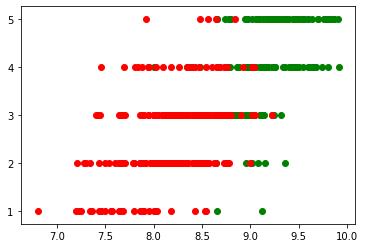

In [193]:
df_yes = df1[df1['Result'] ==1]
df_no = df1[df1['Result'] ==0]

plt.scatter(df_yes['CGPA'], df_yes['University Rating'], color="green")
plt.scatter(df_no['CGPA'], df_no['University Rating'], color = "red")

In [194]:
df_feature = df[['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating']]
X = np.asarray(df_feature)
y = np.asarray(df['Result'])

In [195]:
X[0:5]

array([[337.  , 118.  ,   9.65,   4.  ],
       [324.  , 107.  ,   8.87,   4.  ],
       [316.  , 104.  ,   8.  ,   3.  ],
       [322.  , 110.  ,   8.67,   3.  ],
       [314.  , 103.  ,   8.21,   2.  ]])

## Training the model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state = 4)

In [209]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf',gamma='auto',C=2)
classifier.fit(X_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
y_predict = classifier.predict(X_test)

In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [212]:
accuracy_score(y_test, y_predict)

0.84

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.86      0.82      0.84        38

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



In [214]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','poly']}

In [215]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [216]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.588, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.588, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.941, total=   1.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................


In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_